> 邻近算法，或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻近值来代表。

> kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。


## 一、KNN基础
#### 1、先创建好数据集x_train, y_train，和一个新的数据x_new, 并使用matplot将其可视化出来。

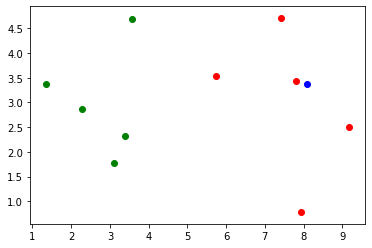

In [2]:
import numpy as np
import matplotlib.pyplot as plt

raw_data_x = [[3.3935, 2.3313],
              [3.1101, 1.7815],
              [1.3438, 3.3684],
              [3.5823, 4.6792],
              [2.2804, 2.8670],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

x_new = np.array([8.0936, 3.3657])

plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], color='g')
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], color='r')
plt.scatter(x_new[0], x_new[1], color='b')
plt.show()

#### 2、计算距离


In [3]:
from math import sqrt

distance = []
for x in x_train:
    d = sqrt(np.sum((x_new - x) ** 2))
    distance.append(d)

# 其实上面这些代码用一行就可以搞定
# distances = [sqrt(np.sum((x_new - x) ** 2)) for x in x_train]

#### 3、将距离进行排序,返回的是排序之后的索引位置

In [4]:
nearsest = np.argsort(distance)

print(nearsest)

[8 7 5 6 9 3 0 1 4 2]


#### 4、取k个点，假设k=5

In [11]:
k = 10
topk_y = [y_train[i] for i in nearsest[:k]]

print(topk_y)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


#### 5、投票

In [6]:
from collections import Counter
Counter(topk_y)

votes = Counter(topk_y)
votes.most_common(1)
y_new = votes.most_common(1)[0][0]

print(y_new)


1


## 2、手动实现knn函数

In [12]:
import numpy as np
from math import sqrt
from collections import Counter

def kNN_classifier(k, x_train, y_train, x_new):
    assert 1 <= k <= x_train.shape[0], 'k must be valid'
    assert x_train.shape[0] == y_train.shape[0], 'the size of x_train must be equal to the size of y_train'
    assert x_train.shape[1] == x_new.shape[0], 'the feature number of x_new must be equal to x_train'
    
    distances = [sqrt(np.sum((x_new - x) ** 2)) for x in x_train]
    nearsest = np.argsort(distances)
    
    topk_y = [y_train[i] for i in nearsest[:k]]
    votes = Counter(topk_y)
    
    return votes.most_common(1)[0][0]


raw_data_x = [[3.3935, 2.3313],
              [3.1101, 1.7815],
              [1.3438, 3.3684],
              [3.5823, 4.6792],
              [2.2804, 2.8670],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

x_new = np.array([8.0936, 3.3657])

y_new = kNN_classifier(5, x_train, y_train, x_new)
print(y_new)


1


## 3、实现一个面向对象的KNN


In [15]:
import numpy as np
from math import sqrt
from collections import Counter

class KNNClassifier():
    
    def __init__(self, k):
        assert 1 <= k, "k must be valid"
        self.k = k
        self._x_train = None
        self._y_train = None

    def fit(self, x_train, y_train):
        assert x_train.shape[0] == y_train.shape[0], "the size of x_train must be equal to the size of y_train"
        assert self.k <= x_train.shape[0], "the size of x_train must be at least k"

        self._x_train = x_train
        self._y_train = y_train
        return self

    def predict(self, x_new):
        x_new = x_new.reshape(1, -1)
        assert self._x_train is not None and self._y_train is not None, "must fit before predict"
        assert x_new.shape[1] == self._x_train.shape[1], "the feature number of x must be equal to x_train"

        y_new = [self._predict(x) for x in x_new]
        return np.array(y_new)

    def _predict(self, x):
        assert x.shape[0] == self._x_train.shape[1], "the feature number of x must be equal to x_train"

        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._x_train]
        nearest = np.argsort(distances)

        topk_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topk_y)

        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "KNN(k=%d)" % self.k
    

raw_data_x = [[3.3935, 2.3313],
              [3.1101, 1.7815],
              [1.3438, 3.3684],
              [3.5823, 4.6792],
              [2.2804, 2.8670],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

x_new = np.array([8.0936, 3.3657])

knn_clf = KNNClassifier(6)
knn_clf.fit(x_train, y_train)
y_new = knn_clf.predict(x_new)
print(y_new[0])


1


## 4、使用sklearn中的手写数字数据集测试KNN

#### 首先，先来了解一下手写数字数据集

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets


digits = datasets.load_digits()
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
knn_classifier.score(x_test, y_test)

0.9861111111111112